<a href="https://colab.research.google.com/github/rdyogesh/face-and-smile-detector/blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

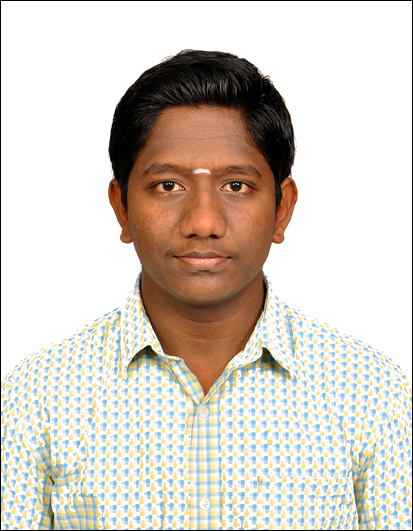

-1

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
img = cv2.imread("a.jpg")
cv2_imshow(img)
cv2.waitKey(0)

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')

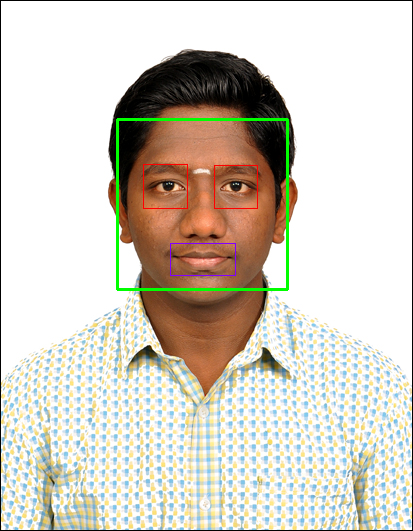

In [4]:
def detection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces= face_cascade.detectMultiScale (gray,1.1, 10)
  for(x , y,  w,  h) in faces:
    cv2.rectangle(img, (x,y) ,(x+w, y+h), (0,255,0), 2)
    roi_gray=gray[y:(y+h), x:(x+w)]
    roi_color=img[y:(y+h), x:(x+w)]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
    for (x_eye, y_eye, w_eye, h_eye) in eyes:
      cv2.rectangle(roi_color,(x_eye, y_eye),(x_eye+w_eye, y_eye+h_eye), (0, 0, 255), 1) 
    smile = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    for (x_smile, y_smile, w_smile, h_smile) in smile: 
      cv2.rectangle(roi_color,(x_smile, y_smile),(x_smile + w_smile, y_smile + h_smile), (255, 0, 130), 1)
  cv2_imshow(img)  
  cv2.imwrite("d.jpg",img)
detection(img)

LIVE IMAGE CAPUTURING AND DETECTING

In [5]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


In [6]:

def take_photo(filename='photo.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  img= js_to_image(data) 
  # grayscale img
  #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #print(gray.shape)
  #cv2_imshow(gray)
  #img = cv2.imread("a.jpg")
  #cv2_imshow(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces= face_cascade.detectMultiScale (gray,1.1, 10)
  for(x , y,  w,  h) in faces:
    cv2.rectangle(img, (x,y) ,(x+w, y+h), (0,255,0), 2)
    roi_gray=gray[y:(y+h), x:(x+w)]
    roi_color=img[y:(y+h), x:(x+w)]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
    for (x_eye, y_eye, w_eye, h_eye) in eyes:
      cv2.rectangle(roi_color,(x_eye, y_eye),(x_eye+w_eye, y_eye+h_eye), (0, 0, 255), 1) 
    smile = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    for (x_smile, y_smile, w_smile, h_smile) in smile: 
      cv2.rectangle(roi_color,(x_smile, y_smile),(x_smile + w_smile, y_smile + h_smile), (255, 0, 130), 1)
  cv2_imshow(img)
  '''
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)
'''

<IPython.core.display.Javascript object>

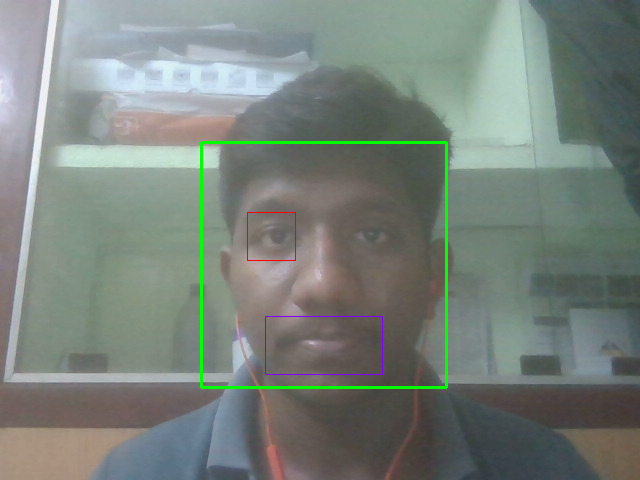

In [9]:
try:
  take_photo('photo.jpg')
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))